In [76]:
import numpy as np
import pandas as pd
import random 

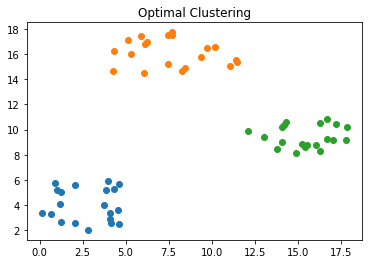

In [77]:

import matplotlib.pyplot
import pygad

cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 8
cluster3_x2_end = 11
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start

c1 = np.array([cluster1_x1, cluster1_x2]).T
c2 = np.array([cluster2_x1, cluster2_x2]).T
c3 = np.array([cluster3_x1, cluster3_x2]).T

data = np.concatenate((c1, c2, c3), axis=0)

matplotlib.pyplot.scatter(cluster1_x1, cluster1_x2)
matplotlib.pyplot.scatter(cluster2_x1, cluster2_x2)
matplotlib.pyplot.scatter(cluster3_x1, cluster3_x2)
matplotlib.pyplot.title("Optimal Clustering")
matplotlib.pyplot.show()


In [78]:
data

array([[ 4.16391408,  2.57825016],
       [ 4.53667017,  3.5838056 ],
       [ 1.0075841 ,  5.20377587],
       [ 3.98061136,  5.8844027 ],
       [ 4.61353819,  5.64427378],
       [ 4.31903582,  5.24820079],
       [ 1.24652922,  5.00054046],
       [ 4.11127184,  3.39008485],
       [ 0.14941415,  3.34871532],
       [ 2.80088265,  2.02065548],
       [ 3.87977587,  5.21735589],
       [ 0.64613666,  3.26878745],
       [ 4.09995817,  2.8875333 ],
       [ 2.06788157,  2.55280881],
       [ 3.76245355,  3.97247205],
       [ 1.17631754,  4.04312573],
       [ 2.069903  ,  5.61770254],
       [ 1.2731582 ,  2.66049423],
       [ 0.88480766,  5.71603638],
       [ 4.61600978,  2.50356576],
       [ 9.35840844, 15.74686612],
       [ 7.48334528, 15.19986642],
       [ 5.28925448, 16.0366233 ],
       [11.06924165, 15.06814402],
       [ 9.70373368, 16.52244362],
       [ 6.2261858 , 16.93592201],
       [ 4.31981681, 16.22104822],
       [ 6.13806952, 16.77850741],
       [11.44647466,

In [79]:
globalBestCenters=None

In [80]:
class Individual:
    def __init__(self,points):
        #self.correctNonFeasible()     
        
        #self.code=random.sample(points,num_clusters)
        self.code=[points[random.randrange(len(points))] for _ in range(3)] #3 je broj klastera
        self.fitness = self.calcFitness(points)
        self.centers=self.code
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
        
    def calcFitness(self,points):

        error=0
        c_index=-1
        min_dist_cluster=float('inf')
        for i in range(len(points)): #idemo po tackama niza tacala (points)
            for j in range(len(self.code)): #trazimo klaster kome bi pripadala ta tacka ed(points[i],self.code[i]) and :
                d= ed(points[i],self.code[j])   
            
                if d<min_dist_cluster:
                    min_dist_cluster=d
                    c_index=j
            
            error+=min_dist_cluster
            
        fitness=1/(error+0.0001)    
                
        return fitness

In [81]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        return dist

In [82]:
class Points:    
    def __init__(self, x, y):
        '''Defines x and y variables'''
        self.X = x
        self.Y = y

    def move(self, dx, dy):
        '''Determines where x and y move'''
        self.X = self.X + dx
        self.Y = self.Y + dy

    def __str__(self):
        return "Point(%s,%s)"%(self.X, self.Y) 

    def getX(self):
        return self.X

    def getY(self):
        return self.Y

    def distance(self, other):
        dx = self.X - other.X
        dy = self.Y - other.Y
        return math.sqrt(dx**2 + dy**2)


In [83]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [84]:
# points=readFile("input2.txt")

In [85]:
points = data.tolist()
points

[[4.163914084831431, 2.578250159867501],
 [4.536670165832975, 3.5838055971396354],
 [1.0075841046110297, 5.2037758673217205],
 [3.980611362323943, 5.884402697236436],
 [4.613538188841905, 5.644273780576245],
 [4.319035817736982, 5.2482007884362005],
 [1.246529216111707, 5.000540464542883],
 [4.111271837158342, 3.3900848522080547],
 [0.14941414993186963, 3.348715318207998],
 [2.800882651530658, 2.020655477522872],
 [3.879775867401602, 5.217355887339659],
 [0.6461366557955295, 3.268787445509628],
 [4.09995816759299, 2.8875332959780504],
 [2.067881571924548, 2.5528088076695843],
 [3.7624535479419947, 3.972472045055532],
 [1.1763175370032497, 4.043125732558874],
 [2.069902995892488, 5.617702539691512],
 [1.2731581950858362, 2.6604942279189583],
 [0.8848076649738751, 5.716036380772488],
 [4.616009780254445, 2.503565764097125],
 [9.358408438705512, 15.746866118872978],
 [7.483345282329799, 15.199866422670274],
 [5.289254480388313, 16.03662329565421],
 [11.069241652503703, 15.068144020468518]

In [86]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions,points,points[0])

60 2 [[4.163914084831431, 2.578250159867501], [4.536670165832975, 3.5838055971396354], [1.0075841046110297, 5.2037758673217205], [3.980611362323943, 5.884402697236436], [4.613538188841905, 5.644273780576245], [4.319035817736982, 5.2482007884362005], [1.246529216111707, 5.000540464542883], [4.111271837158342, 3.3900848522080547], [0.14941414993186963, 3.348715318207998], [2.800882651530658, 2.020655477522872], [3.879775867401602, 5.217355887339659], [0.6461366557955295, 3.268787445509628], [4.09995816759299, 2.8875332959780504], [2.067881571924548, 2.5528088076695843], [3.7624535479419947, 3.972472045055532], [1.1763175370032497, 4.043125732558874], [2.069902995892488, 5.617702539691512], [1.2731581950858362, 2.6604942279189583], [0.8848076649738751, 5.716036380772488], [4.616009780254445, 2.503565764097125], [9.358408438705512, 15.746866118872978], [7.483345282329799, 15.199866422670274], [5.289254480388313, 16.03662329565421], [11.069241652503703, 15.068144020468518], [9.7037336813147

In [87]:
def crossover(parent1,parent2,child1,child2):
    
#     breakpoint = -1
#     while(breakpoint % 2 != 0):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    
    print(breakpoint)
 

    #[(1,2),(3,4),(5,6)]
    #breakpoint random broj[0,len(self.code)]
    #mora da bude Deljivo sa 2!!!
#     return None

In [88]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [89]:
def mutation():
    #alfa=random pomeraj za neki vektor ([0,1],[0,1])
    #njega doddajemo vrednosti izabrane tacke(jedinke)
    return None

# Parametri genetskog algoritma:


In [90]:
POPULATION_SIZE = 20
NUM_GENERATIONS = 10
ELITISIM_SIZE = POPULATION_SIZE // 5


In [91]:

population = [Individual(points) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        print(j)
        print(population[parent1Index].code)
        print(population[parent2Index].code)
#         mutation(newPopulation[j])
#         mutation(newPopulation[j+1])
        

        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points) #izmenio na points u ()
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points)
        
        print(j)
        print(newPopulation[j].code)
        print(newPopulation[j+1].code)
        print()
        print()
        
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

1
4
[[13.057400436771637, 9.400821529283952], [4.613538188841905, 5.644273780576245], [15.53484152858152, 8.76127608064606]]
[[14.085037947213776, 9.022514883886656], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
4
[[13.057400436771637, 9.400821529283952], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
[[14.085037947213776, 9.022514883886656], [4.613538188841905, 5.644273780576245], [15.53484152858152, 8.76127608064606]]


0
6
[[16.311221832481333, 8.330093245511232], [13.057400436771637, 9.400821529283952], [4.111271837158342, 3.3900848522080547]]
[[4.163914084831431, 2.578250159867501], [11.446474661803556, 15.383404654976758], [6.1380695200668045, 16.77850741254194]]
6
[[4.163914084831431, 2.578250159867501], [11.446474661803556, 15.383404654976758], [6.1380695200668045, 16.77850741254194]]
[[16.311221832481333, 8.330093245511232], [13.057400436771637, 9.400821529283952], [4.111271837158342, 3.3900848522080547]]


6
[[13.057400436771637, 9.400821529283952], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
[[4.163914084831431, 2.578250159867501], [14.090694322819429, 10.218953421386551], [4.163914084831431, 2.578250159867501]]


2
8
[[14.085037947213776, 9.022514883886656], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
[[13.057400436771637, 9.400821529283952], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
8
[[14.085037947213776, 9.022514883886656], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
[[13.057400436771637, 9.400821529283952], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]


2
10
[[4.163914084831431, 2.578250159867501], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867501]]
[[4.163914084831431, 2.578250159867501], [0.14941414993186963, 3.348715318207998], [4.163914084831431, 2.578250159867